<a href="https://colab.research.google.com/github/advapplab/sentiment_analysis_election_2022/blob/main/ChiangWanan_Twitter_predict_unlabelled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Init

In [1]:
!pip install datasets
!pip install transformers
!pip install --upgrade xlrd
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 451 kB 14.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 59.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 212 kB 72.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132 kB 53.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 127 kB 34.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [2]:
#import our model from huggingface
number_classes = 2
model_tokenizer = "hfl/chinese-roberta-wwm-ext"

if number_classes == 2:
    model_classifier = "Jiabo/Roberta_Chinese_sentiment"
else:
    model_classifier = "owen198/weibo-wmmbert-6"


In [3]:
model_classifier

'Jiabo/Roberta_Chinese_sentiment'

# 1. load and clean data

In [4]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_ChiangWanan.xlsx

--2022-12-19 10:39:55--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/jasper/scrap_ChiangWanan.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 323135 (316K) [application/octet-stream]
Saving to: ‚Äòscrap_ChiangWanan.xlsx‚Äô

scrap_ChiangWanan.x 100%[===================>] 315.56K  --.-KB/s    in 0.004s  

2022-12-19 10:39:55 (76.2 MB/s) - ‚Äòscrap_ChiangWanan.xlsx‚Äô saved [323135/323135]



In [5]:
import pandas as pd

In [6]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/scrap_ChiangWanan.xlsx')
testing_pd = testing_pd[['Text']]
testing_pd = testing_pd.rename(columns={'Text':'text'})

In [7]:
#dirty data
testing_pd

text
0     Âè∞ÁÅ£Êé®Êñ∞ËÅû\n@mytwnews\n¬∑\n51mÁàÜÊñôÂåóÂ∏ÇÂ∫úÂ§ö‰∫∫Áïô‰ªªËî£Ëê¨ÂÆâÂ∞èÂÖßÈñ£ ÊüØÂ§ßÁ¨ëÔºö‰ª£Ë°®...
1     Lu Authority Philosophy\n@archer_taiwan\n¬∑\n1h...
2     ÈâÖÁü≥ÊúÉ\n@GoldenRockTW\n¬∑\n1h‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®...
3     Âê≥Â•ïËªç JasonWu\n@jasonbosox\n¬∑\n1h‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤...
4     Âè∞ÁÅ£Â§ßÂèî\n@XjxjjxDjdjdj\n¬∑\n4hReplying to \n@Felix...
...                                                 ...
1471  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n@mytwnews\n¬∑\n18 NovËóçË≥™ÁñëÊõæËµ¥‰∏≠ÂúãÈÜ´Â≠∏‰∫§ÊµÅ Èô≥ÊôÇ‰∏≠Á´∂Ëæ¶ÔºöËΩâ...
1472  Êùé‰øäË≥¢\n@jimlee32\n¬∑\n18 Nov on \n@YouTube\n: Ëæ≠Á´ãÂßî...
1473  ysj Taiwan\n@tubbysong\n¬∑\n18 NovÈ´òËôπÂÆâÊùéÂø†Â∫≠ÂàóË¢´ÂëäÔºÅÈ´òËôπÂÆâ...
1474  ‰∏âÁ´ãiNEWS\n@inewsknowledge\n¬∑\n18 NovËæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâ...
1475  Frank\n@FrankDieWelt\n¬∑\n18 NovÈÄôÊòØÂøÖÈ†àÈù¢Â∞çÁöÑÁèæÂØ¶\n\nÊàëÂÄë...

[1476 rows x 1 columns]

In [8]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[„Äê|„Ää*„Äë|„Äã]"
title_pattern_1 = "(?=„Äê)(.*)(?<=„Äë)"
title_pattern_2 = "(?=„Ää)(.*)(?<=„Äã)"
link_pattern="ÁΩëÈ°µÈìæÊé•"
span_pattern='<span.*?>(.+?)</span>'
twitter_username='@([A-Za-z0-9_]+)'
letters='[A-z]'
newline_symbols='/\r?\n|\r/'
numbers='[0-9]'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(twitter_username,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(letters,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(newline_symbols,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(numbers,'',regex=True)

In [9]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

text
0     Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\nÁàÜÊñôÂåóÂ∏ÇÂ∫úÂ§ö‰∫∫Áïô‰ªªËî£Ëê¨ÂÆâÂ∞èÂÖßÈñ£ ÊüØÂ§ßÁ¨ëÔºö‰ª£Ë°®ÊàëÁöÑÂ±ÄËôïÈï∑Â§™ÂÑ™ÁßÄ - Ëá™...
1                                 \n\n¬∑\nËî£Ëê¨ÂÆâËÅΩÊ∏ÖÊ•ö‰∫ÜÔºÅ\n:\n 
2     ÈâÖÁü≥ÊúÉ\n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ\...
3     Âê≥Â•ïËªç \n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ...
4     Âè∞ÁÅ£Â§ßÂèî\n\n¬∑\n  \n\nË¶ÅÊ™¢Ë®éÂÄã‰∫∫ÔºåË∂ÅÁèæÂú®ÈÇÑÂèØ‰ª•Ëá™Áî±Ë™™Ë©±ÔºåÂø´ÈªûÂ§ßÂäõÊ™¢Ë®é„ÄÇ\n‰ª•ÂæåÂÖ±...
...                                                 ...
1471  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\n ËóçË≥™ÁñëÊõæËµ¥‰∏≠ÂúãÈÜ´Â≠∏‰∫§ÊµÅ Èô≥ÊôÇ‰∏≠Á´∂Ëæ¶ÔºöËΩâÁßªËî£Ëê¨ÂÆâÁüΩË∞∑Á∂ìÈ©óÁÑ¶Èªû - Ëá™...
1472  Êùé‰øäË≥¢\n\n¬∑\n   \n\n: Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá...
1473   \n\n¬∑\n È´òËôπÂÆâÊùéÂø†Â∫≠ÂàóË¢´ÂëäÔºÅÈ´òËôπÂÆâÁ•®Â§™Â§öÂò≤Ë´∑È¶¨Ëã±‰πùÊ≠ª‰∫°‰πãÊè°ÔºüÔºÅÂè∞Á©çÈõªÂ§ßËàâÊäïË≥áÊ£ÑÂè∞Ë´ñ...
1474  ‰∏âÁ´ã\n\n¬∑\n Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá‰πüÂ§™Â∑ÆÔºÅÂêπÂôìÁüΩË∞∑Á∂ì...
1475  \n\n¬∑\n ÈÄôÊòØÂøÖÈ†àÈù¢Â∞çÁöÑÁèæÂØ¶\n\nÊàëÂÄëÂÖ¨Âè∏ÁöÑ‰∏â‰ª£ÔºàÊ≥®ÊÑèÊòØ‰∏â‰ª£Ôºâ\n\n‰πüË¢´ÊàëÂïèÂà∞ÊâøË™ç...

[1476 rows x 1 columns]

## 1-2 Tokenization

In [10]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)}

weibo_ds = DatasetDict(weibo_dict)

In [11]:
from transformers import AutoTokenizer

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/689 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [13]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [14]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [15]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

Downloading:   0%|          | 0.00/958 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/409M [00:00<?, ?B/s]

In [16]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-16-e1ee7db0da93>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [17]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

In [18]:
import numpy as np

#prediction results


In [19]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1476
  Batch size = 8


In [20]:
pred

PredictionOutput(predictions=array([[-2.1086917,  1.2203352],
       [-2.2582111,  1.3552265],
       [-2.7559295,  2.0173798],
       ...,
       [ 2.229121 , -1.4934417],
       [ 3.796947 , -3.208681 ],
       [ 2.2763026, -1.5114912]], dtype=float32), label_ids=None, metrics={'test_runtime': 57.4488, 'test_samples_per_second': 25.692, 'test_steps_per_second': 3.22})

In [21]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [23]:
#final table. Remember, 0 = negative, 1 = positive
testing_pd

text  pred
0     Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\nÁàÜÊñôÂåóÂ∏ÇÂ∫úÂ§ö‰∫∫Áïô‰ªªËî£Ëê¨ÂÆâÂ∞èÂÖßÈñ£ ÊüØÂ§ßÁ¨ëÔºö‰ª£Ë°®ÊàëÁöÑÂ±ÄËôïÈï∑Â§™ÂÑ™ÁßÄ - Ëá™...     1
1                                 \n\n¬∑\nËî£Ëê¨ÂÆâËÅΩÊ∏ÖÊ•ö‰∫ÜÔºÅ\n:\n      1
2     ÈâÖÁü≥ÊúÉ\n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ\...     1
3     Âê≥Â•ïËªç \n\n¬∑\n‰∏≠ÂÖ±Â∞çÂè∞ÊñáÊîªÊ≠¶ÂöáÔºåËøëÂπ¥ËÆäÊú¨Âä†Âé≤ÂÇôÂèóÂúãÈöõÈóúÊ≥®ÔºåÂè∞ÁÅ£‰∫∫Êäó‰∏≠‰øùÂè∞ÊòØÂ§©Á∂ìÂú∞Áæ©„ÄÇ...     1
4     Âè∞ÁÅ£Â§ßÂèî\n\n¬∑\n  \n\nË¶ÅÊ™¢Ë®éÂÄã‰∫∫ÔºåË∂ÅÁèæÂú®ÈÇÑÂèØ‰ª•Ëá™Áî±Ë™™Ë©±ÔºåÂø´ÈªûÂ§ßÂäõÊ™¢Ë®é„ÄÇ\n‰ª•ÂæåÂÖ±...     0
...                                                 ...   ...
1471  Âè∞ÁÅ£Êé®Êñ∞ËÅû\n\n¬∑\n ËóçË≥™ÁñëÊõæËµ¥‰∏≠ÂúãÈÜ´Â≠∏‰∫§ÊµÅ Èô≥ÊôÇ‰∏≠Á´∂Ëæ¶ÔºöËΩâÁßªËî£Ëê¨ÂÆâÁüΩË∞∑Á∂ìÈ©óÁÑ¶Èªû - Ëá™...     0
1472  Êùé‰øäË≥¢\n\n¬∑\n   \n\n: Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá...     0
1473   \n\n¬∑\n È´òËôπÂÆâÊùéÂø†Â∫≠ÂàóË¢´ÂëäÔºÅÈ´òËôπÂÆâÁ•®Â§™Â§öÂò≤Ë´∑È¶¨Ëã±‰πùÊ≠ª‰∫°‰πãÊè°ÔºüÔºÅÂè∞Á©çÈõªÂ§ßËàâÊäïË≥áÊ£ÑÂè∞Ë´ñ...     0
1474  ‰∏âÁ´ã\n\n¬∑\n Ëæ≠Á´ãÂßîÂñäÂñäËÄåÂ∑≤ÔºüËî£Ëê¨ÂÆâÊãñÂ§©ÊâçÂÆåÊàêËæ≠ËÅ∑ÊâãÁ∫å Ê•ûÂ•ΩÂπæÊãçÊïàÁéá‰πüÂ§™Â∑ÆÔºÅÂêπÂôìÁüΩË∞∑Á∂ì...     0
1475  \n\n¬∑\n ÈÄôÊòØÂøÖÈ†àÈù¢Â∞çÁöÑÁèæÂØ¶\n\nÊàëÂÄëÂÖ¨Âè∏ÁöÑ‰∏â‰ª£ÔºàÊ≥®ÊÑèÊòØ‰∏â‰ª£Ôºâ\n\n‰πüË¢´ÊàëÂïèÂà∞ÊâøË™ç...     0

[1476 rows x 2 columns]

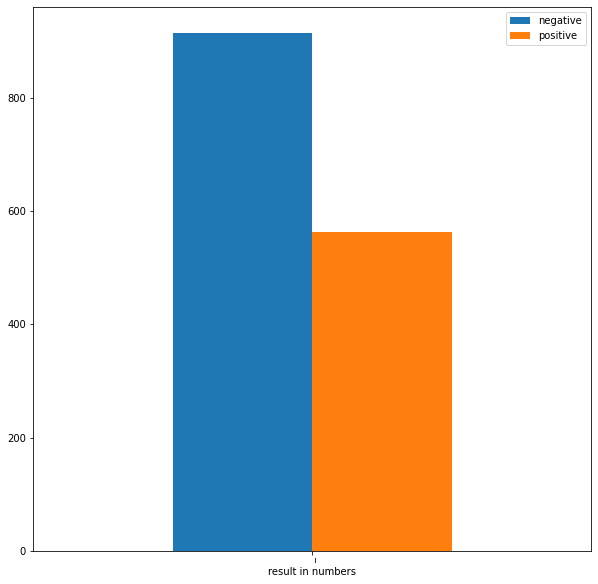

In [24]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import pandas as pd
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

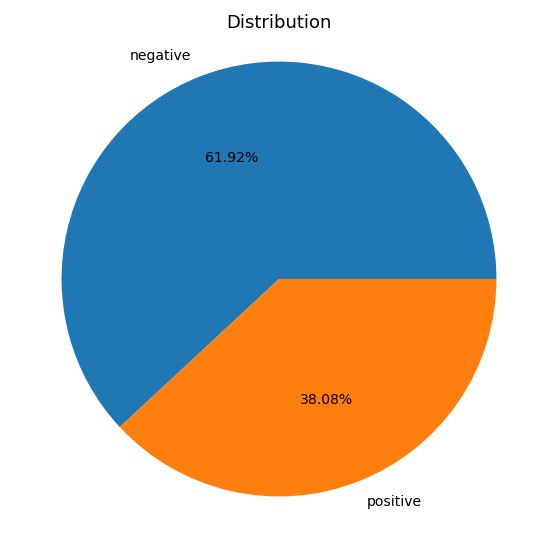

In [25]:
#plot in percentage. Remember, 0 = negative, 1 = positive
def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Distribution', fontsize=18, y=0.95);